In [1]:
from pyluos import Device
import time
import numpy as np

In [2]:
robot = Device('/dev/cu.usbserial-D307RR2E')
robot.modules

-------------------------------------------------
Type                Alias               ID   
-------------------------------------------------
Gate                gate                1    
DynamixelMotor      dxl_2               2    
DynamixelMotor      dxl_12              3    
DynamixelMotor      dxl_30              4    

In [3]:
motor_1 = robot.dxl_2
motor_2 = robot.dxl_30
lift = robot.dxl_12

In [4]:
def land():
    lift.target_rot_position = 90
    
def rise():
    lift.target_rot_position = -30

def compliant():
    motor_1.compliant = True
    motor_2.compliant = True

def genenerate_random_pos():
    m1 = np.random.uniform(low=range_motor_1[0], high=range_motor_1[1], size=1)
    m2 = np.random.uniform(low=range_motor_2[0], high=range_motor_2[1], size=1)
    
    return [m1[0], m2[0]]

def get_pos():
    return [motor_1.rot_position, motor_2.rot_position]

def set_pos(pos):
    motor_1.target_rot_position = pos[0]
    motor_2.target_rot_position = pos[1]

In [23]:
offset90 = np.array([-121.848, -103.079])

offset = offset90 - 180

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/local/opt/python@3.8/Frameworks/Python.framework/Versions/3.8/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/local/opt/python@3.8/Frameworks/Python.framework/Versions/3.8/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/matthieulapeyre/.virtualenvs/reachy/lib/python3.8/site-packages/pyluos/io/serial_io.py", line 89, in _poll
    to_read = self._serial.in_waiting
  File "/Users/matthieulapeyre/.virtualenvs/reachy/lib/python3.8/site-packages/serial/serialposix.py", line 467, in in_waiting
    s = fcntl.ioctl(self.fd, TIOCINQ, TIOCM_zero_str)
OSError: [Errno 6] Device not configured


In [10]:
compliant()
get_pos()

[-111.29, 35.924]

In [27]:
set_pos([0,120])

In [28]:
range_motor_1 = [-90, 20]
range_motor_2 = [-10, 120]

In [36]:
set_pos(genenerate_random_pos())

In [45]:
land()

In [48]:
for _ in range(5):
    land()
    time.sleep(0.5)
    rise()
    time.sleep(0.5)

In [47]:
p = []
for _ in range(1):
    set_pos(genenerate_random_pos())
    time.sleep(0.1)
    land()
    for _ in range(20):
        set_pos(genenerate_random_pos())
        p.append(get_pos()[0])
        time.sleep(0.1)
    rise()
    time.sleep(0.1)
rise()

In [15]:
rise()

In [22]:
compliant()

In [40]:
from matplotlib import pyplot as plt

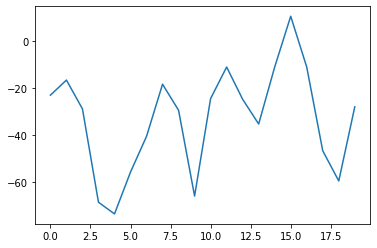

In [41]:
plt.plot(p)

In [54]:
np.min(p)

-95.455

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/local/opt/python@3.8/Frameworks/Python.framework/Versions/3.8/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/local/opt/python@3.8/Frameworks/Python.framework/Versions/3.8/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/matthieulapeyre/.virtualenvs/reachy/lib/python3.8/site-packages/pyluos/io/serial_io.py", line 89, in _poll
    to_read = self._serial.in_waiting
  File "/Users/matthieulapeyre/.virtualenvs/reachy/lib/python3.8/site-packages/serial/serialposix.py", line 467, in in_waiting
    s = fcntl.ioctl(self.fd, TIOCINQ, TIOCM_zero_str)
OSError: [Errno 6] Device not configured
